<a href="https://colab.research.google.com/github/EmilDragola/4KyrsNeiroseti/blob/master/NeirosetiPrakticheskaya%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

In [ ]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential
 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
 
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


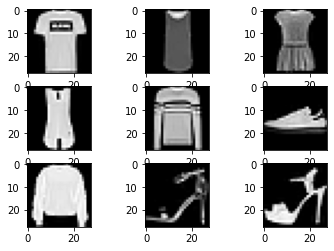

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
plt.show()

In [ ]:
# Создание архитектуры нейронной сети
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Эта модель использует сверточные слои и пулинг для извлечения признаков из изображений, а затем полносвязные слои для классификации изображений на 10 классов. В качестве функции активации используется ReLU, а последний слой имеет функцию активации softmax для получения вероятностей принадлежности к каждому из 10 классов. Модель компилируется с оптимизатором SGD с learning rate=0.01 и momentum=0.9, а в качестве функции потерь используется категориальная кросс-энтропия.

In [ ]:
# Преобразование данных
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1)

# Нормализация данных
trainX = trainX / 255.0
testX = testX / 255.0


In [ ]:
#Создание и компиляция модели
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Обучение модели
history = model.fit(trainX, trainy, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 107s 71ms/step - loss: 0.4200 - accuracy: 0.8473 - val_loss: 0.3008 - val_accuracy: 0.8928
Epoch 2/10
1500/1500 [==============================] - 121s 80ms/step - loss: 0.2674 - accuracy: 0.9021 - val_loss: 0.2612 - val_accuracy: 0.9038
Epoch 3/10
1500/1500 [==============================] - 100s 67ms/step - loss: 0.2192 - accuracy: 0.9181 - val_loss: 0.2452 - val_accuracy: 0.9082
Epoch 4/10
1500/1500 [==============================] - 99s 66ms/step - loss: 0.1837 - accuracy: 0.9319 - val_loss: 0.2344 - val_accuracy: 0.9121
Epoch 5/10
1500/1500 [==============================] - 98s 66ms/step - loss: 0.1552 - accuracy: 0.9420 - val_loss: 0.2243 - val_accuracy: 0.9182
Epoch 6/10
1500/1500 [==============================] - 99s 66ms/step - loss: 0.1296 - accuracy: 0.9526 - val_loss: 0.2437 - val_accuracy: 0.9191
Epoch 7/10
1500/1500 [==============================] - 104s 69ms/step - loss: 0.1043 - accuracy: 0.9617 - val_loss: 0.24

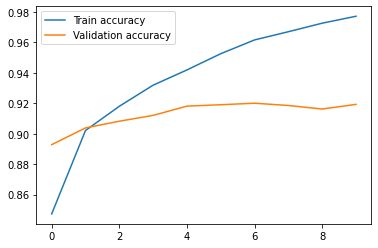

In [ ]:
#Построение графика обучения
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
# Загрузка изображений
img1 = image.load_img('image1.jpg', target_size=(28, 28), color_mode='grayscale')
img2 = image.load_img('image2.jpg', target_size=(28, 28), color_mode='grayscale')
img3 = image.load_img('image3.jpg', target_size=(28, 28), color_mode='grayscale')
img4 = image.load_img('image4.jpg', target_size=(28, 28), color_mode='grayscale')
img5 = image.load_img('image5.jpg', target_size=(28, 28), color_mode='grayscale')

# Преобразование изображений в массивы numpy
img1 = image.img_to_array(img1)
img2 = image.img_to_array(img2)
img3 = image.img_to_array(img3)
img4 = image.img_to_array(img4)
img5 = image.img_to_array(img5)

# Нормализация изображений
img1 /= 255
img2 /= 255
img3 /= 255
img4 /= 255
img5 /= 255

# Преобразование изображений к форме, которую принимает модель
img1 = np.expand_dims(img1, axis=0)
img2 = np.expand_dims(img2, axis=0)
img3 = np.expand_dims(img3, axis=0)
img4 = np.expand_dims(img4, axis=0)
img5 = np.expand_dims(img5, axis=0)

# Получение предсказаний модели
predictions = model.predict(np.concatenate([img1, img2, img3, img4, img5]))

# Метки классов
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Вывод предсказаний и уверенности в них
for i, prediction in enumerate(predictions):
    class_idx = np.argmax(prediction)
    confidence = prediction[class_idx]
    print('Image {}: {} ({:.2f}%)'.format(i+1, labels[class_idx], confidence*100))


1/1 [==============================] - 0s 216ms/step
Image 1: Pullover (10.63%)
Image 2: Coat (10.70%)
Image 3: Bag (10.52%)
Image 4: Bag (10.72%)
Image 5: Coat (10.66%)


# Задание 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/pizza/
%cd /content/drive/MyDrive/steak/
%cd /content/drive/MyDrive/sushi/
%cd /content/drive/MyDrive/food/

/content/drive/MyDrive/pizza
/content/drive/MyDrive/steak
/content/drive/MyDrive/sushi
/content/drive/MyDrive/food


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from imutils import paths
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/pizza/")))
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/steak/")))
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/sushi/")))

In [ ]:
import os
import shutil
from imutils import paths

# Создание папки food1, если ее не существует
if not os.path.exists('/content/drive/MyDrive/food1'):
    os.makedirs('/content/drive/MyDrive/food1')

# Копирование файлов из папок sushi, steak и pizza в папку food1
for folder_name in ['sushi', 'steak', 'pizza']:
    folder_path = '/content/drive/MyDrive/' + folder_name
    for imagePath in paths.list_images(folder_path):
        file_name = imagePath.split(os.path.sep)[-1]
        dst_path = '/content/drive/MyDrive/food1/' + folder_name + '_' + file_name
        shutil.copyfile(imagePath, dst_path)



In [ ]:
# Размер изображения
img_size = (224, 224)

# Список путей к изображениям и соответствующие метки классов
imagePaths = list(paths.list_images("/content/drive/MyDrive/food1"))
labels = [p.split(os.path.sep)[-1].split("_")[0] for p in imagePaths]

# Приведение изображений к одному размеру и масштабирование значений пикселей
X = []
for imagePath in imagePaths:
    # Загрузка изображения, изменение размера до 224x224 пикселей и нормализация
    image = Image.open(imagePath)
    image = image.convert('RGB') # Приводим к 3-канальному изображению
    image = image.resize((224, 224))
    image = np.array(image) / 255.0
    X.append(image)

X = np.array(X)

# Кодирование меток классов
label_dict = {label: i for i, label in enumerate(set(labels))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y)

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Сохранение модели
model.save('/content/drive/MyDrive/my_cnn_model.h5')


# Задание 3

3.1.1 Перевод векторов в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Reshape, Conv2DTranspose

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

3.1.2. Отрисовка примеров

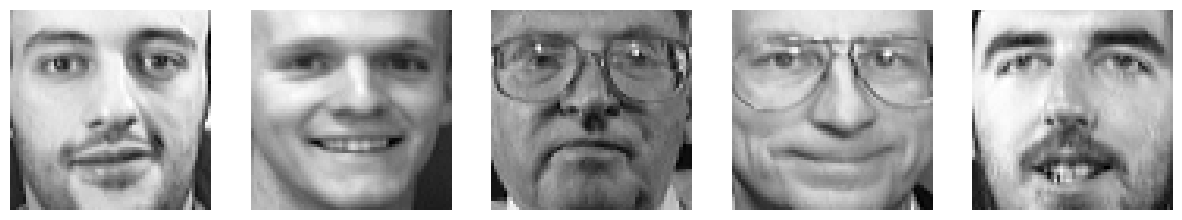

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Верхняя часть лица
X_train = train[:, :(n_pixels + 1) // 2, :]
# Нижняя часть лица
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

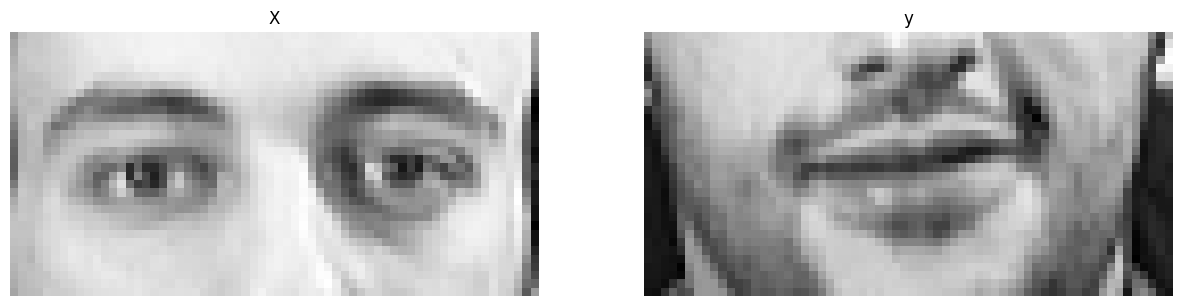

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

3.1.3. Измените размерность y

Остается только изменить размерность y, т.к. сейчас  y  - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

3.2. Создать архитектуру этой задачи

В данном примере используется модель со свёрточными слоями в кодировщике (Encoder) и декодере (Decoder), соединёнными в одну модель. Слои Conv2D выполняют операции свёртки, а слои Conv2DTranspose — операции обратной свёртки.

Каждый свёрточный слой имеет фиксированное количество ядер, задаваемое параметром filters. Размеры ядер задаются параметром kernel_size. В слое Conv2DTranspose размеры ядер также определяются параметром kernel_size.

Функции активации используются для введения нелинейности в выходы слоёв. В данном примере в кодировщике используется функция ReLU, а в декодере — сигмоида.

Для компиляции модели используется оптимизатор adam и функция потерь binary_crossentropy.

3.3 Комиляция сети (метрика, функция потерь. Adam)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Метод compile() позволяет нам определить параметры, необходимые для обучения модели.

Одним из параметров, который мы передаем методу compile(), является оптимизатор, который будет использоваться для обновления весов в процессе обучения. Здесь - оптимизатор Adam.

Другим параметром, который мы передаем методу compile(), является функция потерь (loss function). Эта функция определяет, как мы будем измерять ошибку модели на каждом шаге обучения. В нашем случае мы будем использовать функцию потерь 'categorical_crossentropy', так как мы решаем задачу классификации с несколькими классами.

Третьим параметром, который мы передаем методу compile(), является список метрик, которые мы будем использовать для оценки качества модели. В данном случае мы будем использовать метрики 'accuracy', то есть процент правильных ответов на каждом шаге обучения.

In [ ]:
# Определяем верхнюю половину изображения
n_pixels = train.shape[1]
X_train = train[:, :(n_pixels + 1) // 2, :]
X_test = test[:, :(n_pixels + 1) // 2, :]

# Определяем нижнюю половину изображения
y_train = train[:, n_pixels // 2:, :]
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)

y_test = test[:, n_pixels // 2:, :]
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Encoder
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)

encoder = keras.Model(encoder_inputs, x, name="encoder")
encoder.summary()

# Decoder
decoder_inputs = keras.Input(shape=(16,))
x = keras.layers.Dense(units=7*7*64, activation='relu')(decoder_inputs)
x = keras.layers.Reshape(target_shape=(7, 7, 64))(x)
x = keras.layers.Conv2DTranspose(filters=32, kernel_size=3, activation='relu', strides=2, padding='same')(x)
x = keras.layers.Conv2DTranspose(filters=16, kernel_size=3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = keras.layers.Conv2DTranspose(filters=1, kernel_size=3, activation='sigmoid', padding='same')(x)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

# Autoencoder
autoencoder_inputs = keras.Input(shape=(28, 28, 1))
encoded = encoder(autoencoder_inputs)
decoded = decoder(encoded)
autoencoder = keras.Model(autoencoder_inputs, decoded, name="autoencoder")
autoencoder.summary()

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load and prepare the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255.
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_15 (Dense)            (None, 16)                50192     
                                                                 
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
______________________________________

Эта архитектура включает в себя два сверточных слоя Conv2D с функцией активации ReLU и размером ядер 3х3 и один выходной сверточный слой Conv2D с функцией активации sigmoid. После каждого сверточного слоя мы использовали слой BatchNormalization для стабилизации обучения и ускорения сходимости. Все сверточные слои имеют padding='same', чтобы размеры выходных данных оставались такими же, как и входные. В качестве оптимизатора мы использовали Adam, функцию потерь binary_crossentropy и метрику accuracy.

In [ ]:
#Импортируем необходимые библиотеки и функции
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Создаем модель
model = Sequential()

#Добавляем сверточные слои
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

#Добавляем полносвязные слои
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2048, activation='sigmoid'))

#Компилируем модель
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

#Выводим информацию о модели
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 1024)             

In [ ]:
from tensorflow import keras

model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [ ]:
import tensorflow as tf

# Задаем архитектуру нейронной сети
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# Компилируем модель с использованием функции потерь, оптимизатора и метрики
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Обучаем модель на тренировочных данных в течение 20 эпох
model.fit(train_images, train_labels, epochs=20)


NameError: ignored

In [ ]:
import numpy as np
from tensorflow import keras

# Загрузка данных
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Нормализация данных
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Расширение размерности тензоров
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Создание модели нейронной сети
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

# Компиляция модели
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Обучение модели на данных
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 80s 52ms/step - loss: 0.1394 - accuracy: 0.9572 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 2/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0506 - val_accuracy: 0.9844
Epoch 3/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0403 - val_accuracy: 0.9877
Epoch 4/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0487 - val_accuracy: 0.9869
Epoch 5/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 6/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0411 - val_accuracy: 0.9902
Epoch 7/10
1500/1500 [==============================] - 71s

In [ ]:
from tensorflow.keras.datasets import mnist

# Загрузка данных
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Преобразование данных к формату [0, 1]
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0


In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Загрузка тестовых данных
(test_data, test_labels), _ = tf.keras.datasets.mnist.load_data()

# Преобразование изображений в формат 28x28x1 и нормализация
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)
test_data = test_data.astype('float32') / 255

# Преобразование test_labels в one-hot кодировку
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Предсказание на тестовых данных
predictions = model.predict(test_data)

# Создание матрицы ошибок
cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))
print(cm)

1875/1875 [==============================] - 27s 14ms/step
[[5901    1    5    0    0    0    6    2    2    6]
 [   0 6721   10    0    0    0    2    3    0    6]
 [   1    1 5952    0    0    0    0    4    0    0]
 [   0    0    1 6116    0    3    0    7    2    2]
 [   0    2    1    0 5802    0    1    3    1   32]
 [   1    0    0   14    0 5397    4    0    3    2]
 [   0    2    3    0    1   42 5848    0   22    0]
 [   0    0    2    0    1    0    0 6261    0    1]
 [   1    1    3    7    0    1    0    0 5830    8]
 [   1    0    0    2    5    2    0    2    0 5937]]


In [ ]:
# Оценка точности модели на тестовых данных
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test accuracy:', accuracy)


1875/1875 [==============================] - 24s 13ms/step - loss: 0.9254 - accuracy: 0.9961
Test accuracy: 0.9960833191871643


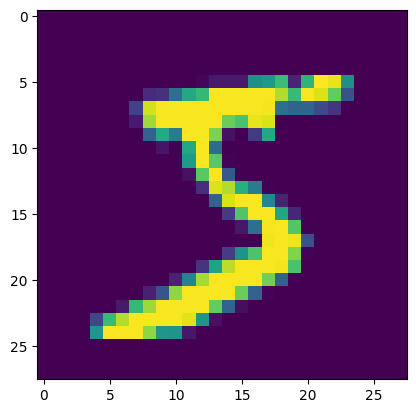

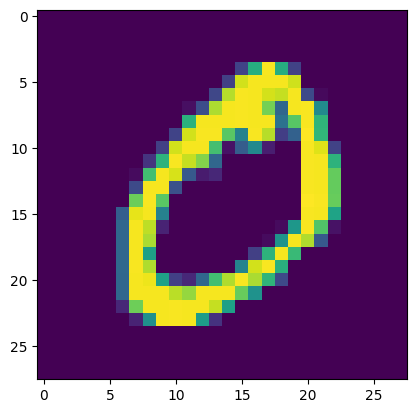

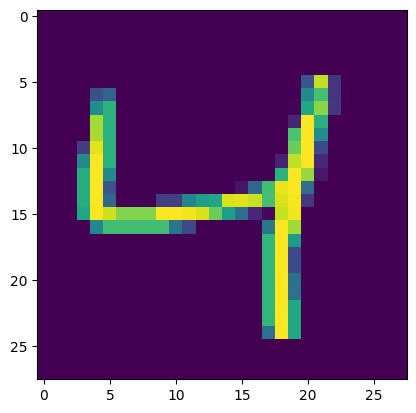

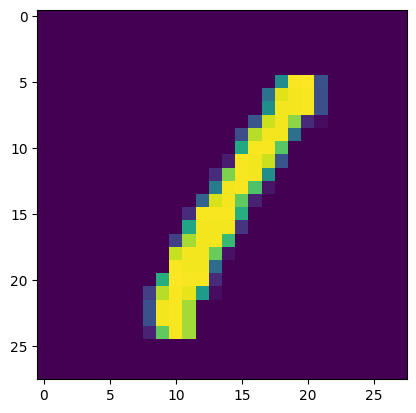

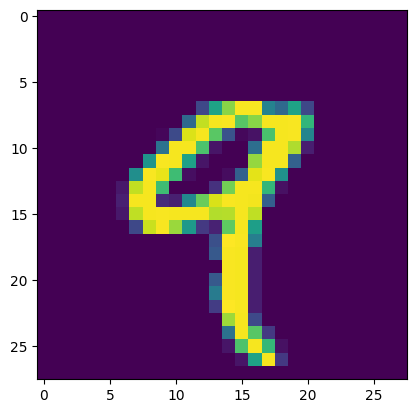

In [ ]:
images = test_data.reshape(test_data.shape[0], 28, 28)
images = images.squeeze()

# Вывод первых 5 изображений
for i in range(5):
    plt.imshow(images[i])
    plt.show()
